# Betting on Football

In [314]:
#TO IMPROVE

# Find the players that scored often during the last games + compute average time playing per game
# check change of coach
# put a higher weight on the recent games
# check max serie > 10, print ?
# Run automatically the program
# stock the game history
# Why Maproba not mutiple of 0.05
# do the same but not including at home or away
# Odd > 10 take in account who did it, and plot it


In [318]:
%run ./1Init.ipynb
%run ./2Mapping.ipynb

In [319]:
# goAllBets = False
%run ./3Competition_mapping.ipynb
%run ./4Unibet.ipynb

###################### Object created:
# dfGames
# Unibet

--- 🚀 Multi-League Extraction ---
✅ 18 teams captured for ger.1
✅ 18 teams captured for ger.2
✅ 20 teams captured for ita.1
✅ 20 teams captured for ita.2
✅ 18 teams captured for fra.1
✅ 18 teams captured for fra.2
✅ 20 teams captured for esp.1
✅ 22 teams captured for esp.2
✅ 20 teams captured for eng.1
✅ 24 teams captured for eng.2
--- 🔎 PROCESSING MATCHES ---
✅ ger.1 (Germany): Found 21 matches
✅ ger.2 (Germany): Found 7 matches
✅ ita.1 (Italy): Found 40 matches
✅ ita.2 (Italy): Found 8 matches
✅ fra.1 (France): Found 15 matches
✅ fra.2 (France): Found 8 matches
✅ esp.1 (Spain): Found 18 matches
✅ esp.2 (Spain): Found 9 matches
✅ eng.1 (England): Found 27 matches
✅ eng.2 (England): Found 15 matches

🏁 SUCCESS: dfGames ready with 168 total matches.


100%|██████████| 168/168 [05:23<00:00,  1.93s/it]


✅ Successfully extracted 12209 odds.
✅ Success: 168 matches processed.
🚩 Unmapped bets: <ArrowStringArray>
[          'H&M1,5',           'H&P1,5',           'D&M1,5',
           'D&P1,5',           'A&M1,5',           'A&P1,5',
           'H&M2,5',           'H&P2,5',           'D&M2,5',
           'D&P2,5',
 ...
      'HAfc/D&M4,5',  'HAfc/ATown&M4,5',     'D/ATown&M4,5',
      'HAfc/D&P4,5',  'HAfc/ATown&P4,5',     'D/ATown&P4,5',
  'HAFC/ATown&LDEM', 'HAFC/ATown&LDEMP',     'D/ATown&LDEM',
    'D/ATown&LDEMP']
Length: 1661, dtype: str
ℹ️ No new matches found. CSV is already up to date.


In [320]:
%run ./5History.ipynb

###################### Object created:
# History
# CSV of History

📈 Starting historical scrape for 198 teams...


  0%|          | 0/198 [00:00<?, ?it/s]

✅ Successfully collected 4798 historical matches.
ℹ️ No new matches to add. History.csv is already up to date.


In [321]:
%run ./6Odd_History.ipynb

###################### Object created:
# Final

LastGames: 10


Calculating Score Stats: 100%|██████████| 7/7 [00:00<00:00, 78.09it/s]


Home stats shape: (198, 72)
Away stats shape: (198, 72)
Calculating current streaks...
Streaks calculated successfully.
Teams in Unibet not in Stats: []
Total games preserved from Unibet: 168


In [322]:
minProba = 0.5
minDiffProba = 1
results_dict = {}
# weight = [[f"{round(i * 0.05, 2)} {round(1 - i * 0.05, 2)}", round(i * 0.05, 2), round(1 - i * 0.05, 2)] for i in range(11)]
weight = [["0.5 0.5", 0.5, 0.5]]

param_names = [['H', '1Hs', '1n', '2Hs', '2n'],
               ['D', '1Ds', '1n', '2Ds', '2n'],
               ['A', '1As', '1n', '2As', '2n'],
               
               ['H/D', '1DH', '1n', '2DH', '2n'],
               ['D/A', '1DA', '1n', '2DA', '2n'],
               ['H/A', '1HA', '1n', '2HA', '2n'],
               
               #LDEM
               ['LDEM', '1LDEMs', '1n', '2LDEMs', '2n'],
               ['LDEMP', '1LDEMPs', '1n', '2LDEMPs', '2n'],
               
               ['H/D&LDEM', '1DHLDEMs', '1n', '1DHLDEMPs', '2n'],
               ['D/A&LDEM', '1DALDEMs', '1n', '2DALDEMs', '2n'], 
               ['H/A&LDEM', '1HALDEMs', '1n', '2HALDEMs', '2n'], 
               
               ['H/D&LDEMP', '1DHLDEMPs', '1n', '2DHLDEMPs', '2n'],
               ['D/A&LDEMP', '1DALDEMPs', '1n', '2DALDEMPs', '2n'],
               ['H/A&LDEMP', '1HALDEMPs', '1n', '2HALDEMPs', '2n'],
               
               #Moins de goals
               ['H/D&M4,5', '1DHB<5', '1n', '2DHB<5', '2n'],
               ['D/A&M4,5', '1DAB<5', '1n', '2DAB<5', '2n'],
               ['H/A&M4,5', '1HAB<5', '1n', '2HAB<5', '2n'],
               
               ['H/D&M3,5', '1DHB<4', '1n', '2DHB<4', '2n'],
               ['D/A&M3,5', '1DAB<4', '1n', '2DAB<4', '2n'],
               ['H/A&M3,5', '1HAB<4', '1n', '2HAB<4', '2n'],
               
               ['H/D&M2,5', '1DHB<3', '1n', '2DHB<3', '2n'],
               ['D/A&M2,5', '1DAB<3', '1n', '2DAB<3', '2n'],
               ['H/A&M2,5', '1HAB<3', '1n', '2HAB<3', '2n'],
               
               ['H/D&M1,5', '1DHB<2', '1n', '2DHB<2', '2n'],
               ['D/A&M1,5', '1DAB<2', '1n', '2DAB<2', '2n'],
               ['H/A&M1,5', '1HAB<2', '1n', '2HAB<2', '2n'],
               
               #Plus de goals
               ['H/D&P4,5', '1DHB>4', '1n', '2DHB>4', '2n'],
               ['D/A&P4,5', '1DAB>4', '1n', '2DAB>4', '2n'],
               ['H/A&P4,5', '1HAB>4', '1n', '2HAB>4', '2n'],
               
               ['H/D&P3,5', '1DHB>3', '1n', '2DHB>3', '2n'],
               ['D/A&P3,5', '1DAB>3', '1n', '2DAB>3', '2n'],
               ['H/A&P3,5', '1HAB>3', '1n', '2HAB>3', '2n'],
               
               ['H/D&P2,5', '1DHB>2', '1n', '2DHB>2', '2n'],
               ['D/A&P2,5', '1DAB>2', '1n', '2DAB>2', '2n'],
               ['H/A&P2,5', '1HAB>2', '1n', '2HAB>2', '2n'],
               
               ['H/D&P1,5', '1DHB>1', '1n', '2DHB>1', '2n'],
               ['D/A&P1,5', '1DAB>1', '1n', '2DAB>1', '2n'],
               ['H/A&P1,5', '1HAB>1', '1n', '2HAB>1', '2n'],
               
               #Buts> <
               ['M0,5', '1B<1', '1n', '2B<1', '2n'],
               ['M1,5', '1B<2', '1n', '2B<2', '2n'],
               ['M2,5', '1B<3', '1n', '2B<3', '2n'],
               ['M3,5', '1B<4', '1n', '2B<4', '2n'],
               ['M4,5', '1B<5', '1n', '2B<5', '2n'],
               ['M5,5', '1B<6', '1n', '2B<6', '2n'],
               
               ['P0,5', '1B>0', '1n', '2B>0', '2n'],
               ['P1,5', '1B>1', '1n', '2B>1', '2n'],
               ['P2,5', '1B>2', '1n', '2B>2', '2n'],
               ['P3,5', '1B>3', '1n', '2B>3', '2n'],
               ['P4,5', '1B>4', '1n', '2B>4', '2n'],
               ['P5,5', '1B>5', '1n', '2B>5', '2n'],
        
              ]
def weighted_mean(value1, value2, weight1, weight2):
    weighted_mean = (max(weight1, weight2) * max(value1, value2)) + (min(weight1, weight2) * min(value1, value2))
    return weighted_mean

for w in weight:        
    results = pd.DataFrame(columns=['n', 'IdGame', 'Date', 'Home', 'Away', 'Bet', 'Odd', 'MaProba', 'UnibetProba', 'DiffProba'])
    for params in param_names:
        for _, row in Final.iterrows():
            if ((row[params[2]] >= 10) and (row[params[4]] >= 10)): 
                if (w[1]+w[2]) == 1:
                    meanBet = weighted_mean(row[params[1]]/row[params[2]], row[params[3]]/row[params[4]], w[1], w[2])
                if "&" in params[0]:
                    OddCorrected = row[params[0]]*1.05
                else:
                    OddCorrected = row[params[0]]
                probaBet = 1/OddCorrected
                if (probaBet <= meanBet):
                    results.loc[len(results)] = {'IdGame': row['IdGame'], 'Date': row['DateTime'], 'Home': row['Home'], 'Away': row['Away'], 'Bet': params[0], 
                                                'Odd': OddCorrected, 'MaProba': meanBet, 'UnibetProba': probaBet, 'DiffProba': meanBet/probaBet,
                                                 'n': row[params[2]]
                                                }

    results = results[(results['DiffProba'] >= minDiffProba)
#                       & (results['MaProba'] >= minProba)
                     ]
    results = results.sort_values('DiffProba', ascending=False)
    results_dict[f'{w[0]}'] = results

In [326]:
# results_dict["0.5 0.5"][results_dict["0.5 0.5"]["Away"] == "Lens"]

In [333]:
##### from datetime import datetime, timedelta, date

limits = [[0.9, 1], 
          [0.8, 0.899], 
          [0.7, 0.799],
          [0.6, 0.699],
          [0.5, 0.599],
          [0.4, 0.499], 
          [0.3, 0.399],
          [0.2, 0.299],
          [0.1, 0.199],
          [0  , 0.099]]
# limits = [[0.9, 1], 
#           [0.8, 0.899], 
#           [0.7, 0.799],
#           [0.6, 0.699],
#           [0.5, 0.599]]

# # minDiffProba = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# minDiffProba = [1.1, 1.1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8]
# # minDiffProba = [1.1, 1.1, 1.15, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2]

# minDiffProba = [1.1, 1.15, 1.2, 1.35, 1.5]
# minDiffProba = [1.2, 1.3, 1.4, 1.5, 1.6]
minDiffProba = [1.1, 1.1, 1.1, 1.1, 1.1]

# Now you can use any of these:
# day_range = [0, 4]
# day_range = [0, 1]
day_range = [1] 
r = results_dict["0.5 0.5"]

conditions = [(r["MaProba"].between(limits[i][0], limits[i][1])) & 
              (r["DiffProba"] >= minDiffProba[i]) for i in range(len(minDiffProba))]
r = pd.concat([r[condition] for condition in conditions], ignore_index=True)
if len(day_range) == 1:
    day_range = [day_range[0], day_range[0]]

# 4. Calculate Start: First day in range at 00:00:00
start_date = (date.today() + timedelta(days=day_range[0])).strftime('%Y-%m-%d 00:00:00')
# 5. Calculate End: Last day in range at 23:59:59
end_date = (date.today() + timedelta(days=day_range[1])).strftime('%Y-%m-%d 23:59:59')

# 6. Apply filtering and sorting
r = r[(r["Date"] >= start_date) & (r["Date"] <= end_date)]
r = r.sort_values("Date")
r.style.background_gradient(cmap="viridis").format(precision=3)

# Priority bet UnibetProba > 0.64 -> combi
# Priority bet UnibetProba < 0.4 -> cash

,n,IdGame,Date,Home,Away,Bet,Odd,MaProba,UnibetProba,DiffProba
1,10.000,3369266_1,2026-02-15 13:30:00,Holstein Kiel,Schalke 04,"M3,5",1.240,1.000,0.806,1.240
10,10.000,3369266_1,2026-02-15 13:30:00,Holstein Kiel,Schalke 04,"H/A&M3,5",1.680,0.800,0.595,1.344
19,10.000,3369266_1,2026-02-15 13:30:00,Holstein Kiel,Schalke 04,"H/A&M4,5",1.449,0.800,0.690,1.159
76,10.000,3369266_1,2026-02-15 13:30:00,Holstein Kiel,Schalke 04,"D/A&M3,5",1.712,0.650,0.584,1.112
79,10.000,3369266_1,2026-02-15 13:30:00,Holstein Kiel,Schalke 04,"H/A&P1,5",1.701,0.650,0.588,1.106
36,10.000,3370063_1,2026-02-15 15:00:00,Spezia,Frosinone,LDEM,1.600,0.725,0.625,1.160
49,10.000,3369672_1,2026-02-15 15:00:00,Monza,Juve Stabia,"P2,5",2.120,0.618,0.472,1.311
109,10.000,3369672_1,2026-02-15 15:00:00,Monza,Juve Stabia,LDEM,2.010,0.573,0.498,1.151
69,10.000,3364957_1,2026-02-15 18:00:00,Torino,Bologna,"P2,5",1.910,0.600,0.524,1.146
105,10.000,3364957_1,2026-02-15 18:00:00,Torino,Bologna,A,2.370,0.500,0.422,1.185


In [328]:
History[History["Away"] == "Real Sociedad"]

,Date,Home,Score,Away,Competition,ScoreH,ScoreA,But,Result,Ds,Hs,As,DA,DH,HA,LDEMs,LDEMPs,DALDEMs,DHLDEMs,HALDEMs,DALDEMPs,DHLDEMPs,HALDEMPs,IdGame
30,2026-02-11,Athletic Club,0 - 11st Leg,Real Sociedad,esp.1,0,11,11,Away,0,0,1,1,0,1,0,1,0,0,0,1,0,1,2026-02-11Athletic ClubReal Sociedad
155,2026-02-04,Alavés,2 - 3,Real Sociedad,esp.1,2,3,5,Away,0,0,1,1,0,1,1,0,1,0,1,0,0,0,2026-02-04AlavésReal Sociedad
179,2026-02-01,Athletic Club,1 - 1,Real Sociedad,esp.1,1,1,2,Draw,1,0,0,1,1,0,1,0,1,1,0,0,0,0,2026-02-01Athletic ClubReal Sociedad
630,2026-01-09,Getafe,1 - 2,Real Sociedad,esp.1,1,2,3,Away,0,0,1,1,0,1,1,0,1,0,1,0,0,0,2026-01-09GetafeReal Sociedad
890,2025-12-20,Levante,1 - 1,Real Sociedad,esp.1,1,1,2,Draw,1,0,0,1,1,0,1,0,1,1,0,0,0,0,2025-12-20LevanteReal Sociedad
928,2025-12-16,Eldense,1 - 2,Real Sociedad,esp.1,1,2,3,Away,0,0,1,1,0,1,1,0,1,0,1,0,0,0,2025-12-16EldenseReal Sociedad
1119,2025-12-06,Alavés,1 - 0,Real Sociedad,esp.1,1,0,1,Home,0,1,0,0,1,1,0,1,0,0,0,0,1,1,2025-12-06AlavésReal Sociedad
1185,2025-12-03,Reddis,0 - 2,Real Sociedad,esp.1,0,2,2,Away,0,0,1,1,0,1,0,1,0,0,0,1,0,1,2025-12-03ReddisReal Sociedad
1407,2025-11-22,Osasuna,1 - 3,Real Sociedad,esp.1,1,3,4,Away,0,0,1,1,0,1,1,0,1,0,1,0,0,0,2025-11-22OsasunaReal Sociedad
1549,2025-11-07,Elche,1 - 1,Real Sociedad,esp.1,1,1,2,Draw,1,0,0,1,1,0,1,0,1,1,0,0,0,0,2025-11-07ElcheReal Sociedad


In [191]:
#Write Day folders
for methods in weight:
    r = results_dict[methods[0]]
    r['DateD'] = pd.to_datetime(r['Date']).dt.strftime('%Y-%m-%d')

    dates = pd.to_datetime(r['Date'])
    r['Week'] = dates.dt.year.astype(str) + "W" + dates.dt.isocalendar().week.astype(str)
    r['Week'].unique()
    
    for date in r['DateD'].unique():
        date_folder = os.path.join(os.getcwd() + "\Proba", date + "\\" + methods[0])
        os.makedirs(date_folder, exist_ok=True)
        date_data = r[r['DateD'] == date]
        date_data.to_csv(os.path.join(date_folder, 'data.csv'), index=False)
    
    #Write Week folders
    for date in r['Week'].unique():
        date_folder = os.path.join(os.getcwd() + "\Proba", date + "\\" + methods[0])
        os.makedirs(date_folder, exist_ok=True)
        date_data = r[r['Week'] == date]
        date_data.to_csv(os.path.join(date_folder, 'data.csv'), index=False)

In [192]:
limits = [0.5, 1]
dateR = "2023-03-04"
weight = "/0.5 0.5/"
r = pd.read_csv("Proba/" + dateR + weight + "data.csv")
# r = r[(r["MaProba"] >= limits[0]) & (r["MaProba"] <= limits[1])]
from datetime import datetime, timedelta, date

limits = [[0.9, 1], 
          [0.8, 0.899], 
          [0.7, 0.799],
          [0.6, 0.699],
          [0.5, 0.599]]

minDiffProba = [1.1, 1.15, 1.2, 1.35, 1.5]
day_lag = 0

r = results_dict["0.5 0.5"]
r1 = r[(r["MaProba"] >= limits[0][0]) & (r["MaProba"] <= limits[0][1]) & (r["DiffProba"] >= minDiffProba[0])]
r2 = r[(r["MaProba"] >= limits[1][0]) & (r["MaProba"] <= limits[1][1]) & (r["DiffProba"] >= minDiffProba[1])]
r3 = r[(r["MaProba"] >= limits[2][0]) & (r["MaProba"] <= limits[2][1]) & (r["DiffProba"] >= minDiffProba[2])]
r4 = r[(r["MaProba"] >= limits[3][0]) & (r["MaProba"] <= limits[3][1]) & (r["DiffProba"] >= minDiffProba[3])]
r5 = r[(r["MaProba"] >= limits[4][0]) & (r["MaProba"] <= limits[4][1]) & (r["DiffProba"] >= minDiffProba[4])]
r = pd.concat([r1, r2, r3, r4, r5], ignore_index=True).reset_index(drop=True)

dateR.replace("-","")
u = "https://www.espn.com/soccer/scoreboard/_/league/all/date/" + dateR.replace("-","")
get_page(u)
soup = BeautifulSoup(driver.page_source)
row_data2 = []

for g in soup.find_all(class_='scoreboard-top no-tabs'):
    for t in g.find_all(class_='team__content'):
        for sa in t.find_all(class_='score icon-font-after'):
            sa = sa.text
        for sb in t.find_all(class_='score icon-font-before'):
            sb = sb.text
        if len(t.find_all(class_='score icon-font-before'))>0:
            for sn in t.find_all(class_='short-name'):
                aw = sn.text
        else:
            for sn in t.find_all(class_='short-name'):
                hm = sn.text
    row_data2.append({"Home": hm,
                      "Away": aw,
                      "HomeS": sa,
                      "AwayS": sb})
GamesDay = pd.DataFrame(row_data2)
GamesDay["DateD"] = dateR
GamesDay

GamesDay["Away"].replace(Dict_teams, inplace=True)
GamesDay["Home"].replace(Dict_teams, inplace=True)
GamesDay["Away"].replace(Match_teams, inplace=True)
GamesDay["Home"].replace(Match_teams, inplace=True)
# GamesDay2 = GamesDay

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=144.0.7559.133); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#invalidsessionidexception
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0x605093
	0x6050d4
	0x3fb490
	0x3ea43e
	0x408ef3
	0x46f00c
	0x484df9
	0x467f56
	0x4396c9
	0x43a484
	0x857e34
	0x8530c9
	0x870add
	0x61db38
	0x6258ad
	0x60d848
	0x60da12
	0x5f75fa
	0x75c47ba9
	0x77acc3ab
	0x77acc32f


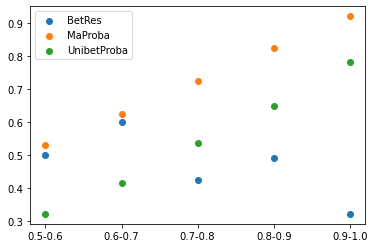

,BetRes,MaProba,UnibetProba
MaProbCat,,,
0.5-0.6,0.500000,0.531250,0.323429
0.6-0.7,0.600000,0.626136,0.416078
0.7-0.8,0.426471,0.724064,0.537284
0.8-0.9,0.491228,0.823844,0.650465
0.9-1.0,0.322581,0.921408,0.782816


In [13]:
GamesDay2 = r.merge(GamesDay, on=["Home", "Away", "DateD"], how='left')
GamesDay2['Result'] = GamesDay2.apply(lambda row: 'D' if row['HomeS'] == row['AwayS'] else 'H' if row['HomeS'] > row['AwayS'] else 'A', axis=1)
GamesDay2['HDA'] = GamesDay2.apply(lambda row: row['Result'] in row['Bet'], axis=1)

GamesDay2['threshold'] = GamesDay2['Bet'].str.split('&', n=1).str[1].str.replace(',', '.').str[1:]


GamesDay2['r'] = GamesDay2['threshold'].apply(lambda row: "L" + row if (row == "DEMP") or (row == "DEM") else np.nan)

GamesDay2['threshold'] = GamesDay2['threshold'].apply(lambda row: np.nan if (row == "DEMP") or (row == "DEM") else row)
GamesDay2['threshold'] = GamesDay2['threshold'].astype(float)


# GamesDay2['r'] = GamesDay2.apply(lambda row: row['r'] if (row['r'] == "LDEMP") or (row['r'] == "LDEM") else row['Bet'].str.split('&', n=1).str[1].str[:1].map({'M': '<', 'P': '>'}))
GamesDay2['r'] = GamesDay2.apply(lambda row: row['r'] if (row['r'] == "LDEMP") or (row['r'] == "LDEM") else ('<' if row['Bet'].split('&')[1][0] == 'M' else '>') if len(row['Bet'].split('&')) >= 2 else np.nan, axis=1)
# GamesDay2['r'] = GamesDay2['Bet'].str.split('&', n=1).str[1].str[:1].map({'M': '<', 'P': '>'})
# GamesDay2['r'] = GamesDay2['Bet'].str.split('&').str[1]

GamesDay2 = pd.DataFrame(GamesDay2).assign(
    HomeS=pd.to_numeric(GamesDay2['HomeS'], errors='coerce'),
    AwayS=pd.to_numeric(GamesDay2['AwayS'], errors='coerce'),
    Goals=lambda x: x['HomeS'] + x['AwayS'],
    CompG=lambda x: np.where(
        x[[#'threshold', 
           'Goals', 'r']].isna().any(axis=1),
        True,
        np.where(
            x['r'] == '<',
            x['Goals'] < x['threshold'],
            np.where(
                x['r'] == '>',
                x['Goals'] > x['threshold'],
                np.where(
                    x['r'] == 'LDEM',
                    (x['HomeS'] > 0) & (x['AwayS'] > 0),
                    np.where(
                        x['r'] == 'LDEMP',
                        (x['HomeS'] == 0) | (x['AwayS'] == 0),
                        None
                    )
                )
            )
        )
    )
)


GamesDay2["BetRes"] = GamesDay2.apply(lambda row: row['CompG'] and row['HDA'], axis=1)
GamesDay3 = GamesDay2.drop(["Result", "HDA", "threshold", "r", "Goals", "CompG"], axis=1)

#Plot
bins = np.arange(0-0.001, 1.1-0.001, 0.1)
labels = [f"{x:.1f}-{x+0.1:.1f}" for x in bins[:-1]]
GamesDay3['MaProbCat'] = pd.cut(GamesDay3['MaProba'], bins=bins, labels=labels)
GamesDay3['UProbCat'] = pd.cut(GamesDay3['UnibetProba'], bins=bins, labels=labels)
grouped_data = GamesDay3.groupby('MaProbCat')[['BetRes', 'MaProba', 'UnibetProba']].mean()
fig, ax = plt.subplots()
ax.scatter(grouped_data.index, grouped_data['BetRes'], label='BetRes')
ax.scatter(grouped_data.index, grouped_data['MaProba'], label='MaProba')
ax.scatter(grouped_data.index, grouped_data['UnibetProba'], label='UnibetProba')
ax.legend()
plt.show()
grouped_data.dropna()
#GamesDay3[GamesDay3["MaProbCat"] == "0.8-0.9"]

In [15]:
GamesDay3[GamesDay3["MaProbCat"] == "0.9-1.0"]

,n,IdGame,Date,Home,Away,Bet,Odd,MaProba,UnibetProba,DiffProba,DateD,Week,HomeS,AwayS,BetRes,MaProbCat,UProbCat
1,10.0,2794823_1,2023-05-13 16:00:00,Manchester United,Wolverhampton,"M3,5",1.4300,0.900000,0.699301,1.287000,2023-05-13,2023W19,NaN,NaN,False,0.9-1.0,0.7-0.8
2,10.0,2774142_1,2023-05-13 21:30:00,Sporting CP,Maritimo,"M3,5",1.4200,0.900000,0.704225,1.278000,2023-05-13,2023W19,NaN,NaN,False,0.9-1.0,0.7-0.8
3,10.0,2774136_1,2023-05-13 19:00:00,Portimonense,Benfica,"M3,5",1.4200,0.900000,0.704225,1.278000,2023-05-13,2023W19,NaN,NaN,False,0.9-1.0,0.7-0.8
4,10.0,2761895_1,2023-05-07 14:00:00,Lyngby,FC Midtjylland,"D/A&M4,5",1.4175,0.900000,0.705467,1.275750,2023-05-07,2023W18,NaN,NaN,True,0.9-1.0,0.7-0.8
5,10.0,2783947_1,2023-05-12 21:00:00,Lens,Reims,"M3,5",1.3900,0.900000,0.719424,1.251000,2023-05-12,2023W19,NaN,NaN,False,0.9-1.0,0.7-0.8
6,10.0,2784201_1,2023-05-06 13:00:00,Hansa Rostock,Jahn Regensburg,H/A,1.3000,0.950000,0.769231,1.235000,2023-05-06,2023W18,NaN,NaN,True,0.9-1.0,0.7-0.8
7,10.0,2785540_1,2023-05-08 16:00:00,Fulham,Leicester,"M3,5",1.3700,0.900000,0.729927,1.233000,2023-05-08,2023W19,NaN,NaN,False,0.9-1.0,0.7-0.8
8,10.0,2750083_1,2023-05-14 14:30:00,Sturm Graz,Austria Klagenfurt,"H/A&P1,5",1.3545,0.900000,0.738280,1.219050,2023-05-14,2023W19,NaN,NaN,True,0.9-1.0,0.7-0.8
9,10.0,2687306_1,2023-05-20 21:00:00,Barcelona,Real Sociedad,"M3,5",1.3500,0.900000,0.740741,1.215000,2023-05-20,2023W20,NaN,NaN,False,0.9-1.0,0.7-0.8
10,10.0,2794094_1,2023-05-07 19:00:00,Aris,AEK Athens,"H/A&M4,5",1.3440,0.900000,0.744048,1.209600,2023-05-07,2023W18,NaN,NaN,True,0.9-1.0,0.7-0.8
